# Decision tree with Loan application 

สมมติว่าเราเป็นผู้พิจาณาสินเชื่อของธนาคารแห่งหนึ่ง ในแต่ละวันจำเป็นที่ต้องพิจาณาลูกค้าที่มาขอกู้จำนวนมาก ดังนั้นเราจึงได้นำ mcahine learning เข้ามาปรับใช้เพื่อให้งานง่ายและรวดเร็วมากขึ้น ซึ่งตอนนี้เราได้มีข้อมูลอยู่ทั้งหมด 9 ชุด (N=9) และ algorithm ที่เราเลือกใช้คือ decision tree เนื่องจากข้อมูลของเรามีลักษณะคล้าย if else คือ หากเขาเป็นคน Credit ดี และยังมีรายได้ที่สูง เขาก็ควรที่จะได้รับการกู้ 

## 1.ขั้นตอนการเตรียมข้อมูล

#### 1.1 เราจะต้องเรียก library ที่สำคัญในการเตียมข้อมูล 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2 เรียกไฟล์ข้อมูลที่เราต้องการประมาณการ (ในที่นี้เรานำข้อมูลใส่ไว้ใน github แล้ว เพื่อๆกด run ตามคำสั่งด้านล่างได้เลย)

In [2]:
data=pd.read_csv('https://github.com/Siriratkant/Decision-tree/raw/master/decision%20.csv')
data

,Credit,Term,Income,y
0,good,3,high,safe
1,fair,5,low,risky
2,fair,3,high,safe
3,poor,5,high,risky
4,good,3,low,risky
5,fair,5,low,safe
6,poor,3,high,risky
7,poor,5,low,safe
8,fair,3,high,safe


In [3]:
data.y.value_counts()

safe     5
risky    4
Name: y, dtype: int64

* จากตารางด้านบน ข้อมูลของเราประกอบไปด้วย   
    * Feature มีอยู่ 3 ตัว คือ Credit,Term,Income
    * output คือ y ซึ่งแบ่งเป็น 2 กลุ่ม คือ safe = 5 และ risky = 4  ยกตัวอย่างบรรทัดที่ 0 คือ ถ้า ลูกค้าค้ามี credit = good ประกอบกับมีระยะเวลาชำระ 3 ปี(Term =3) และยังเป็นคนที่มีรายได้สูง(Income = high) คนนี้ถือว่าเป็นคนที่ควรจะปล่อยกู้ (Safe) เป็นต้น
    * N=9 คือเรามีข้อมูลอยู่ 9 ชุด

#### 3.เปลี่ยนข้อมูล category เป็น dummy

In [4]:
data.columns

Index(['Credit ', 'Term', 'Income', 'y'], dtype='object')

In [5]:
a = pd.get_dummies(data['Credit '], prefix = "Credit") 
b = pd.get_dummies(data['Term'], prefix = "Term")
c = pd.get_dummies(data['Income'], prefix = "Income")

หมายเหตุ : ตรง data['Credit '] ต้องเว้นช่องว่างด้วย ปัญหาน่าจะมาจากตาราง excel

In [6]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,Credit,Term,Income,y,Credit_fair,Credit_good,Credit_poor,Term_3,Term_5,Income_high,Income_low
0,good,3,high,safe,0,1,0,1,0,1,0
1,fair,5,low,risky,1,0,0,0,1,0,1
2,fair,3,high,safe,1,0,0,1,0,1,0
3,poor,5,high,risky,0,0,1,0,1,1,0
4,good,3,low,risky,0,1,0,1,0,0,1


In [7]:
data = data.drop(columns = ['Credit ','Term', 'Income'])
data

,y,Credit_fair,Credit_good,Credit_poor,Term_3,Term_5,Income_high,Income_low
0,safe,0,1,0,1,0,1,0
1,risky,1,0,0,0,1,0,1
2,safe,1,0,0,1,0,1,0
3,risky,0,0,1,0,1,1,0
4,risky,0,1,0,1,0,0,1
5,safe,1,0,0,0,1,0,1
6,risky,0,0,1,1,0,1,0
7,safe,0,0,1,0,1,0,1
8,safe,1,0,0,1,0,1,0


## ขั้นตอนการประมาณการ

หลังจากเตรียมข้อมูลเรียบร้อยแล้ว เราจะทำการประมารการ โดยเริ่มจาก

#### 1. เรียกใช้ Scikit-learn 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
data.columns

Index(['y', 'Credit_fair', 'Credit_good', 'Credit_poor', 'Term_3', 'Term_5',
       'Income_high', 'Income_low'],
      dtype='object')

In [10]:
columns =['Credit_fair', 'Credit_good', 'Credit_poor', 'Term_3', 'Term_5',
       'Income_high', 'Income_low']

#### 2. กำหนดตัวแปร X และ Y และทำการประมาณการ

In [11]:
X =data[columns]
y =data['y']

In [12]:
model=DecisionTreeClassifier(criterion='gini',random_state=2) 
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

* criteruion เราเลือกใช้ gini ส่วนค่าอื่นๆ เราไม่ได้กำนหนด มันจึงกำหนดตาม defult ของ library
* กำหนด ramdom_state = ค่าไหนก็ได้ จะทำให้ในการ run แต่ละครั้งมันจะใช้ feture เดิม เสมอ ซึ่งหากไม่กำหนด(random_state =None) ในกรณีที่มีบาง feature ให้ค่า gini impurity เท่ากัน มันจะทำการสุ่ม feature ใหม่ทุกรอบ ซึ่งจะทำให้เราได้ decision tree ที่ไม่เหมือนกันเลยในทุกรอบที่ run ซึ่งนี่ถือเป็นข้อเสียของ decision tree คือ หากมีจำนวน observation เปลี่ยนไปเพียงเล็กน้อย decisiontree จะเปลี่ยนทันที การสรุปผลก็จะเปลี่ยนตามไปด้วย

#### 3. plot graph

In [13]:
from sklearn.externals.six import StringIO  # StringIO จะทำหน้าที่เก็บค่าจาก export_graphviz
from sklearn.tree import export_graphviz
import pydotplus #เอาไว้แปลงข้อมูลเพื่อที่จะได้สร้างกราฟได้
from IPython.display import Image  

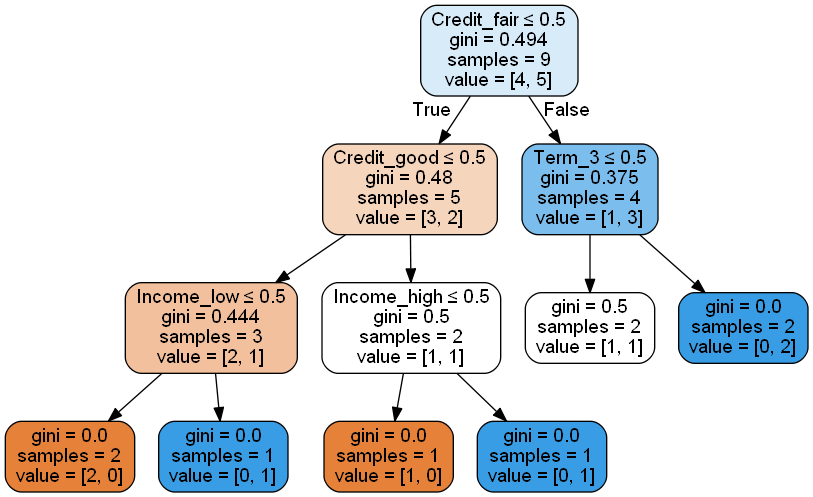

In [14]:
dot_data = StringIO() #สร้าง object ชื่อ dot_data และให้เท่ากับ StringIO
export_graphviz(model, out_file=dot_data,  #.ใส่ค่าลงไป โดยอันแรกเราก็จะใส่ model ที่เป็น object ที่เก็บค่าการประมาณการของเราไว้ และ 
                feature_names=columns, #คือ feature ที่เรามี 
                filled=True, rounded=True,  
                special_characters= True ) #เช่นพวกค่าน้อยกว่าหรือเท่ากับ

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #สร้าง object ชื่อ graph เพื่อใส่คำสั่ง pydotplus ซึ่งเป็นคำสั่งในการ พล็อตรูป
Image(graph.create_png()) #และเราก็ใส่คำสั่ง Imageให้มันพล็อตกราฟที่เราสร้างไว้ให้ออกมาในรูป .png 

# อ่านคำสั่งเพิ่มเติมได้ที่ :  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [15]:
graph.write_png('decision tree.png')

True